In [17]:
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus']=False
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [18]:
# 데이터불러오기
(train_data,train_label),(test_data,test_label) = keras.datasets.fashion_mnist.load_data()

print(train_data[:5])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [19]:
train_data.shape

(60000, 28, 28)

In [20]:
# 3차원 데이터 변환
train_scaled = train_data.reshape(-1,28,28,1)
train_scaled.shape

(60000, 28, 28, 1)

In [21]:
test_scaled = test_data.reshape(-1,28,28,1)
test_scaled.shape

(10000, 28, 28, 1)

In [22]:
train_scaled = train_scaled/255
train_scaled[0]
test_scaled = test_scaled/255



In [23]:
sub_data,val_data,sub_label,val_label = train_test_split(train_scaled,train_label)
sub_data.shape,val_data.shape

((45000, 28, 28, 1), (15000, 28, 28, 1))

In [24]:
# 합성곱 신경망 선언
model = keras.Sequential()

# CNN
model.add(keras.layers.Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))

# CNN - 1회 반복
model.add(keras.layers.Conv2D(64,kernel_size=3,activation='relu',padding='same'))
# 최대풀링
model.add(keras.layers.MaxPooling2D(2))



In [25]:
# 인공신경망의 선언
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10,activation='softmax'))

model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

In [26]:
# from tensorflow.keras.utils import plot_model
# keras.utils.plot_model(model)

In [30]:
# 순환 신경망 설정 adam
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
# 콜백 - 20번돌고, 가장 낮은 손실률을 저장
check_cb = keras.callbacks.ModelCheckpoint('cnn-test.h5',save_best_only=True)
early_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

In [32]:
history = model.fit(sub_data,sub_label,epochs=15,batch_size=64,\
    validation_data=(val_data,val_label),callbacks=[check_cb,early_cb])

Epoch 1/15
704/704 [==============================] - 19s 26ms/step - loss: 0.9172 - accuracy: 0.6842 - val_loss: 0.5459 - val_accuracy: 0.7915
Epoch 2/15
704/704 [==============================] - 18s 26ms/step - loss: 0.5674 - accuracy: 0.7950 - val_loss: 0.4615 - val_accuracy: 0.8371
Epoch 3/15
704/704 [==============================] - 18s 25ms/step - loss: 0.4912 - accuracy: 0.8251 - val_loss: 0.4030 - val_accuracy: 0.8575
Epoch 4/15
704/704 [==============================] - 17s 24ms/step - loss: 0.4470 - accuracy: 0.8416 - val_loss: 0.3953 - val_accuracy: 0.8572
Epoch 5/15
704/704 [==============================] - 16s 23ms/step - loss: 0.4151 - accuracy: 0.8549 - val_loss: 0.3608 - val_accuracy: 0.8687
Epoch 6/15
704/704 [==============================] - 16s 23ms/step - loss: 0.3955 - accuracy: 0.8627 - val_loss: 0.3494 - val_accuracy: 0.8764
Epoch 7/15
704/704 [==============================] - 16s 23ms/step - loss: 0.3780 - accuracy: 0.8653 - val_loss: 0.3274 - val_accuracy:

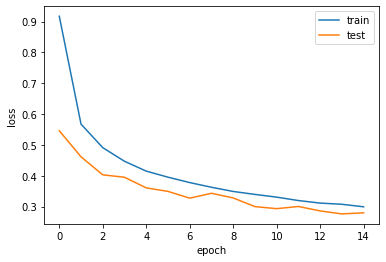

In [33]:
# 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])
plt.show()

In [34]:
# 정확도
score = model.evaluate(val_data,val_label)
print("loss, accuracy : ",score)

469/469 [==============================] - 2s 4ms/step - loss: 0.2799 - accuracy: 0.9006
loss, accuracy :  [0.2799281179904938, 0.900600016117096]


In [35]:
# 예측
results = model.predict(val_data[0:1])
print(results)

1/1 [==============================] - 0s 75ms/step
[[1.7555796e-04 9.5012581e-08 4.0497589e-06 1.1058987e-07 1.1616666e-05
  8.8493124e-07 5.1252930e-05 5.6987659e-07 9.9975556e-01 3.6481177e-07]]


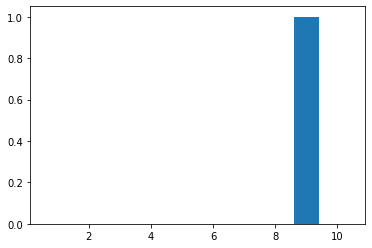

In [36]:
plt.bar(range(1,11),results[0])
plt.show()

In [40]:
classes = ['티셔츠','바지','스웨터','드레스','코트',
           '샌달','셔츠','스니커즈','가방','앵클 부츠']

In [41]:
classes[np.argmax(results)]

'가방'